# TASK 3

## Exploring the Response Variable and Concluding the Initial Exploration

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

In [83]:
df = pd.read_csv('cleaned_data1.csv')

In [84]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [85]:
df['default payment next month'].mean()

0.2217971797179718

In [86]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

## Introduction to Scikit-Learn

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression()

In [89]:
lr

LogisticRegression()

In [90]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
         tol=0.0001, verbose=0, warm_start=False)

In [91]:
lr.C = 0.1
lr.solver = 'liblinear'
lr

LogisticRegression(C=0.1, solver='liblinear')

In [92]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [93]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [95]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [96]:
lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

## Generating Synthetic Data

 Synthetic data is a valuable learning tool for illustrating mathematical concepts. In order to make synthetic data, we will again illustrate here how to use NumPy's random library to generate random numbers, as well as matplotlib's scatter and plot functions to create scatter and line plots, respectively.

In [98]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

## Data for a Linear Regression     y= ax+ b+ N()

In [99]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

In [100]:
y

array([ 1.41690038e+00, -6.09451800e-02, -1.77788582e+00, -1.56713719e+00,
       -1.77026436e-02, -3.32069221e+00,  9.60462293e-01, -1.14730508e+00,
        6.09577816e-02, -1.52328540e-01,  1.26009422e+00, -1.59709196e+00,
       -1.06128658e+00,  5.61239236e-01, -4.77615747e-02, -6.73722492e-01,
       -3.79166202e-01, -7.31133847e-01, -8.56818907e-01, -1.71931064e-01,
       -3.48757756e-01,  2.31537765e+00,  4.35151166e-01,  9.83300878e-01,
        1.84182883e+00,  3.02788800e-01, -1.16027970e+00, -2.08813248e+00,
       -1.09331203e+00,  1.47571173e+00, -1.69579367e+00, -5.93984464e-01,
        4.57551125e-01, -7.62292429e-01, -1.91553346e-01, -4.73875521e-01,
       -6.51058029e-01,  1.07097988e+00,  4.55522870e-01,  1.36740495e+00,
        1.03031717e+00, -2.67214828e-01, -1.29604831e+00,  2.41565292e+00,
       -9.41127229e-01, -7.67261831e-01,  1.21240424e+00,  1.58429051e+00,
       -4.10402701e-01, -3.07725460e-01, -9.01412285e-01,  9.48389859e-02,
       -1.86344791e+00, -

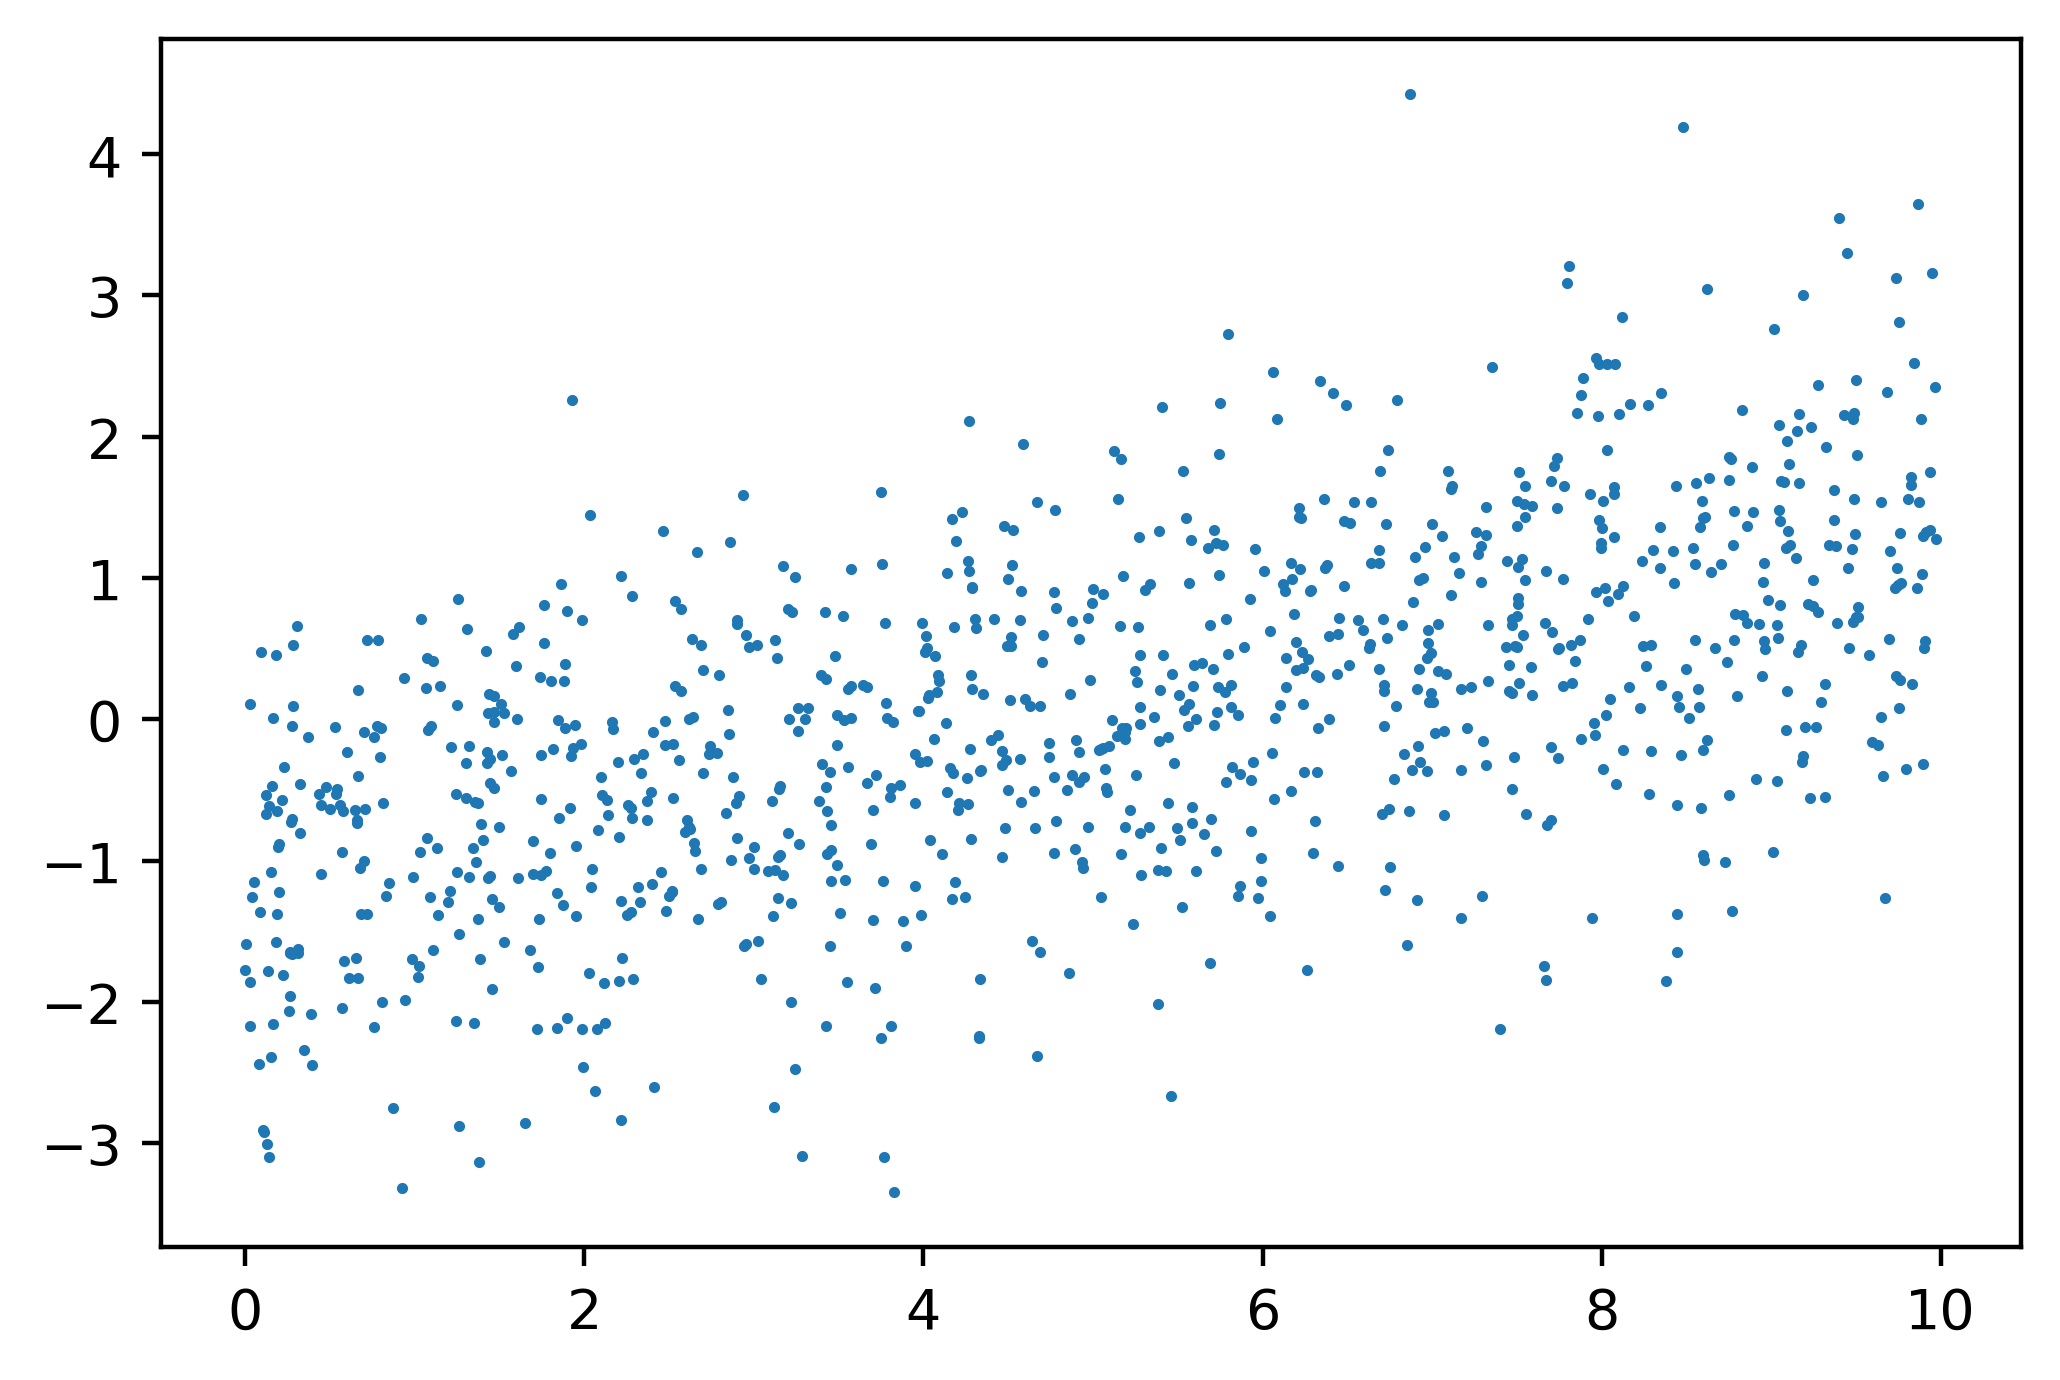

In [101]:
plt.scatter(X,y,s=1)

## Linear Regression in Scikit-Learn

In [102]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [103]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [104]:
y_pred = lin_reg.predict(X.reshape(-1,1))

In [105]:
y_pred

array([-0.16029588,  0.56770858, -1.16098207, -0.43558019, -0.80900449,
       -0.93962008, -0.7141839 , -0.33182144, -0.20891199,  0.13204299,
       -0.15508129,  0.48344751, -0.6705183 ,  0.94645247, -1.09551929,
        0.44803891, -0.15961709,  0.17974355, -0.82429162, -0.68576177,
        0.76073757,  1.16282173, -0.40895747,  0.50049682,  0.94230414,
        0.98603088, -0.95712849, -1.06751501, -0.75361965,  0.94651264,
       -0.92519875, -0.15048933,  1.13792614,  0.11847805,  0.4994275 ,
       -0.40393744,  0.48652327,  0.84206098, -1.11736   ,  0.63928386,
        1.21226589,  0.63453457, -0.48811845,  0.73321802, -0.91348747,
       -0.08619624,  1.01960772, -0.45650667, -0.47052132, -0.84915438,
       -1.11477089,  0.46812433, -0.65329436, -0.5238759 ,  0.01864618,
       -1.03317268,  0.21677421, -0.80907005,  0.25322918,  0.51834453,
       -0.91562749, -0.16741509,  0.50548346, -0.16711918, -1.04135537,
        0.12503344,  0.43202231,  0.0746105 ,  1.10601524,  0.24

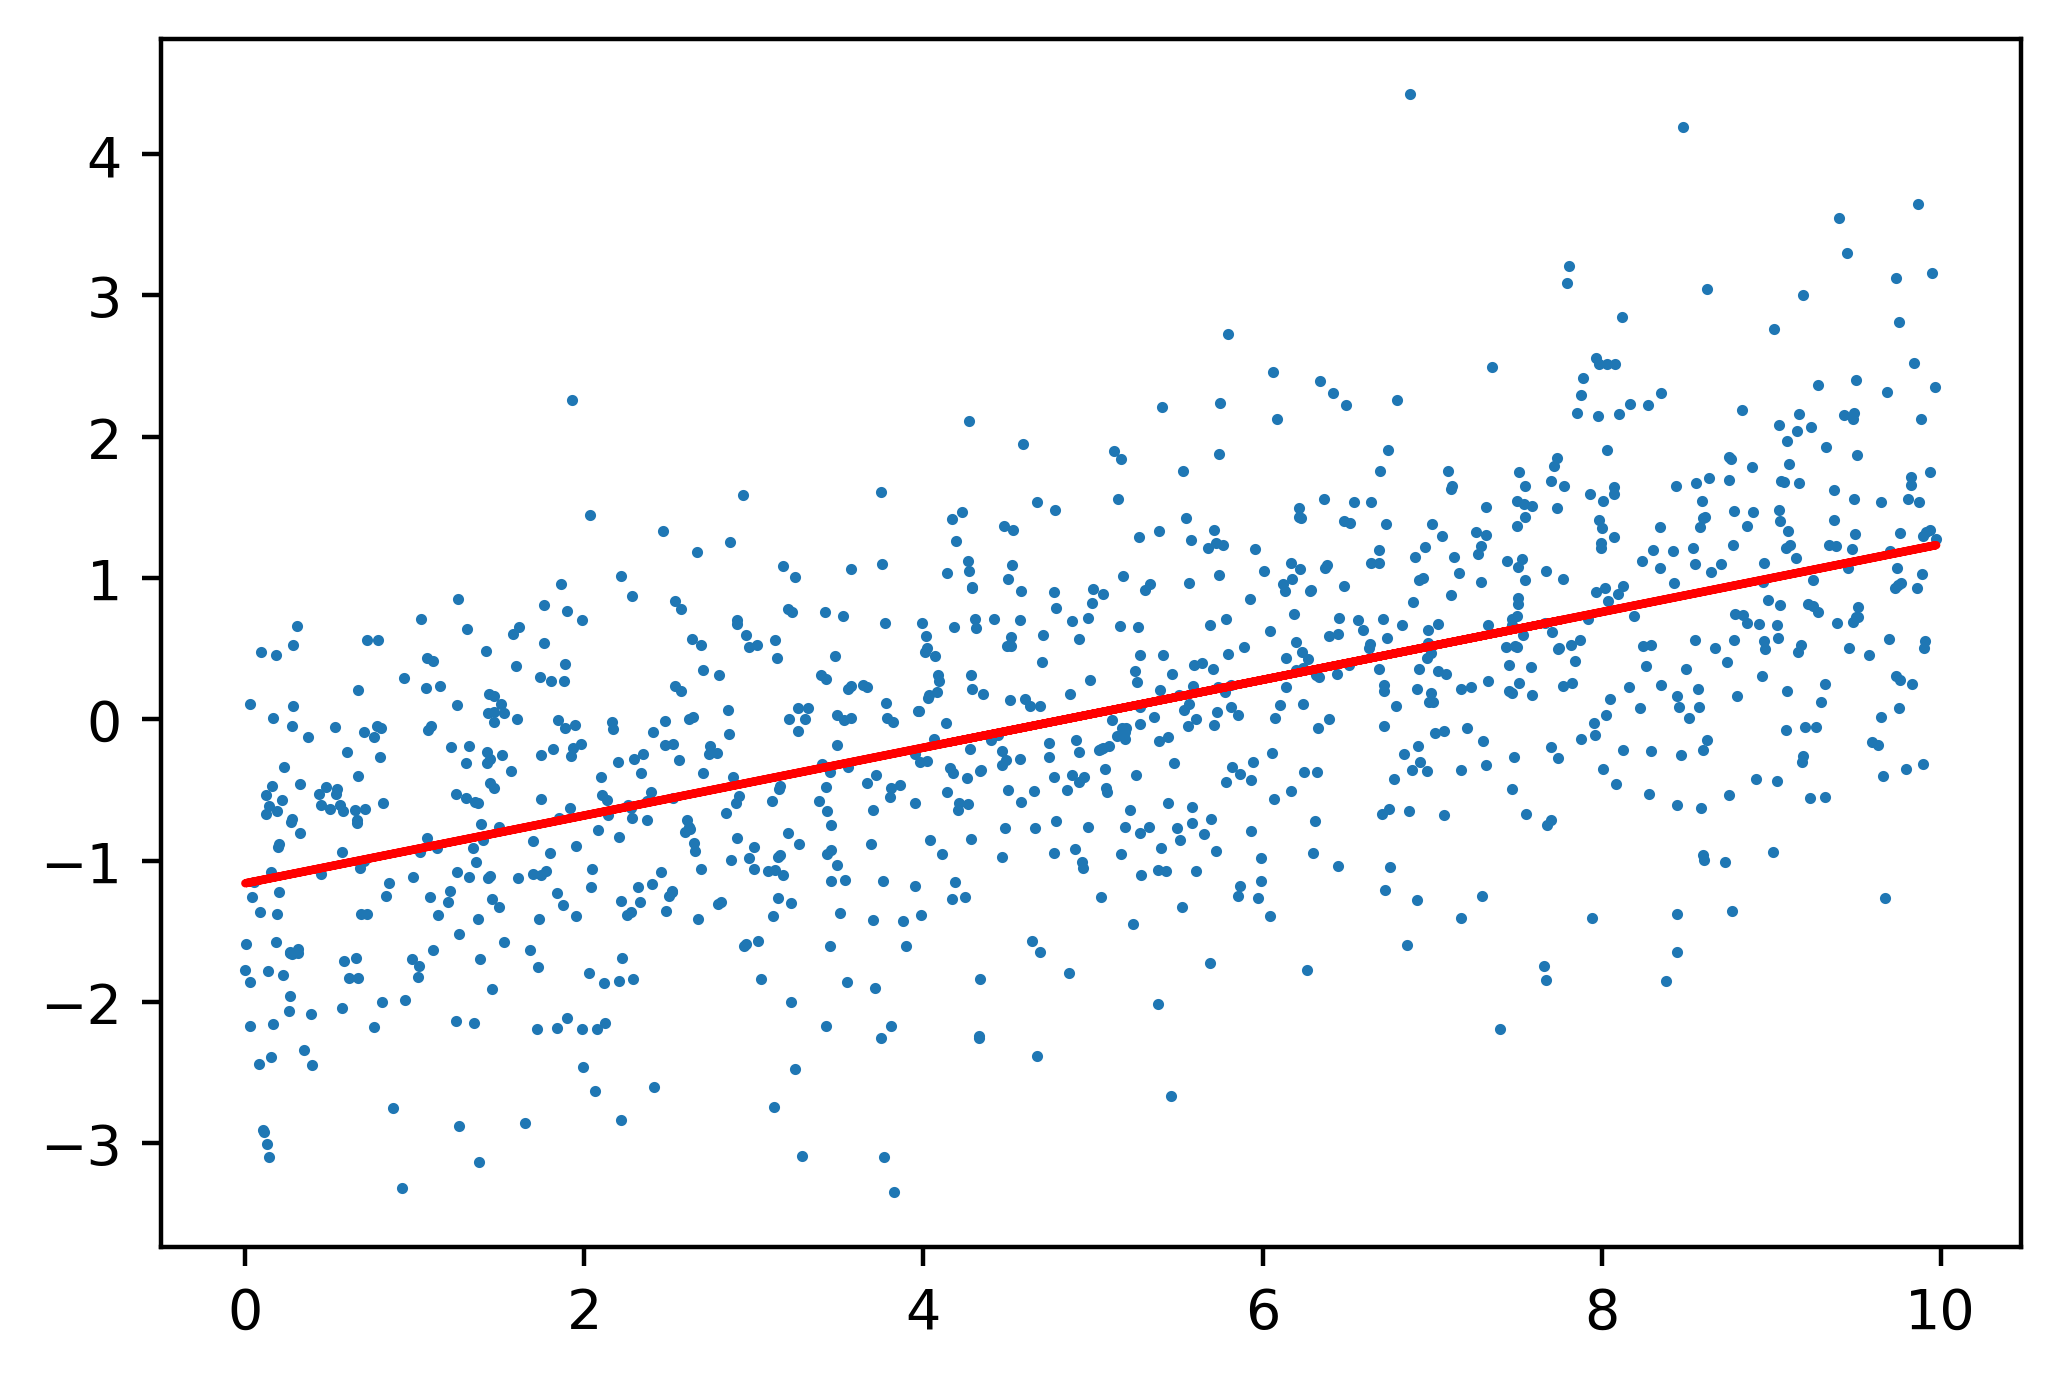

In [106]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

## Model Performance Metrics for Binary Classification

## Splitting the Data: Training and Testing sets

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [111]:
X_train

array([[2],
       [1],
       [2],
       ...,
       [2],
       [3],
       [1]], dtype=int64)

In [112]:
X_test

array([[2],
       [2],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [113]:
y_train

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [114]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [116]:
np.mean(y_train)

0.223102526838873

In [117]:
np.mean(y_test)

0.21657603600225014

In [118]:
np.mean(X_train)

1.8437016548685012

In [119]:
np.mean(X_test)

1.836864804050253

## Classification Accuracy

In [122]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [123]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [124]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [127]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

## True Positive Rate, False Positive Rate, and Confusion Matrix

## Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python

In [129]:
P = sum(y_test)
P

1155

In [130]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [131]:
TPR = TP/P
TPR

0.0

In [132]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [133]:
FNR = FN/P
FNR

1.0

In [134]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [135]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

## Discovering Predicted Probabilities: how does logistic regression make predictions?

## Obtaining Predicted Probabilities from a Trained Logistic Regression Model

In [136]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [137]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [138]:
prob_sum.shape

(5333,)

In [139]:
np.unique(prob_sum)

array([1.])

In [140]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

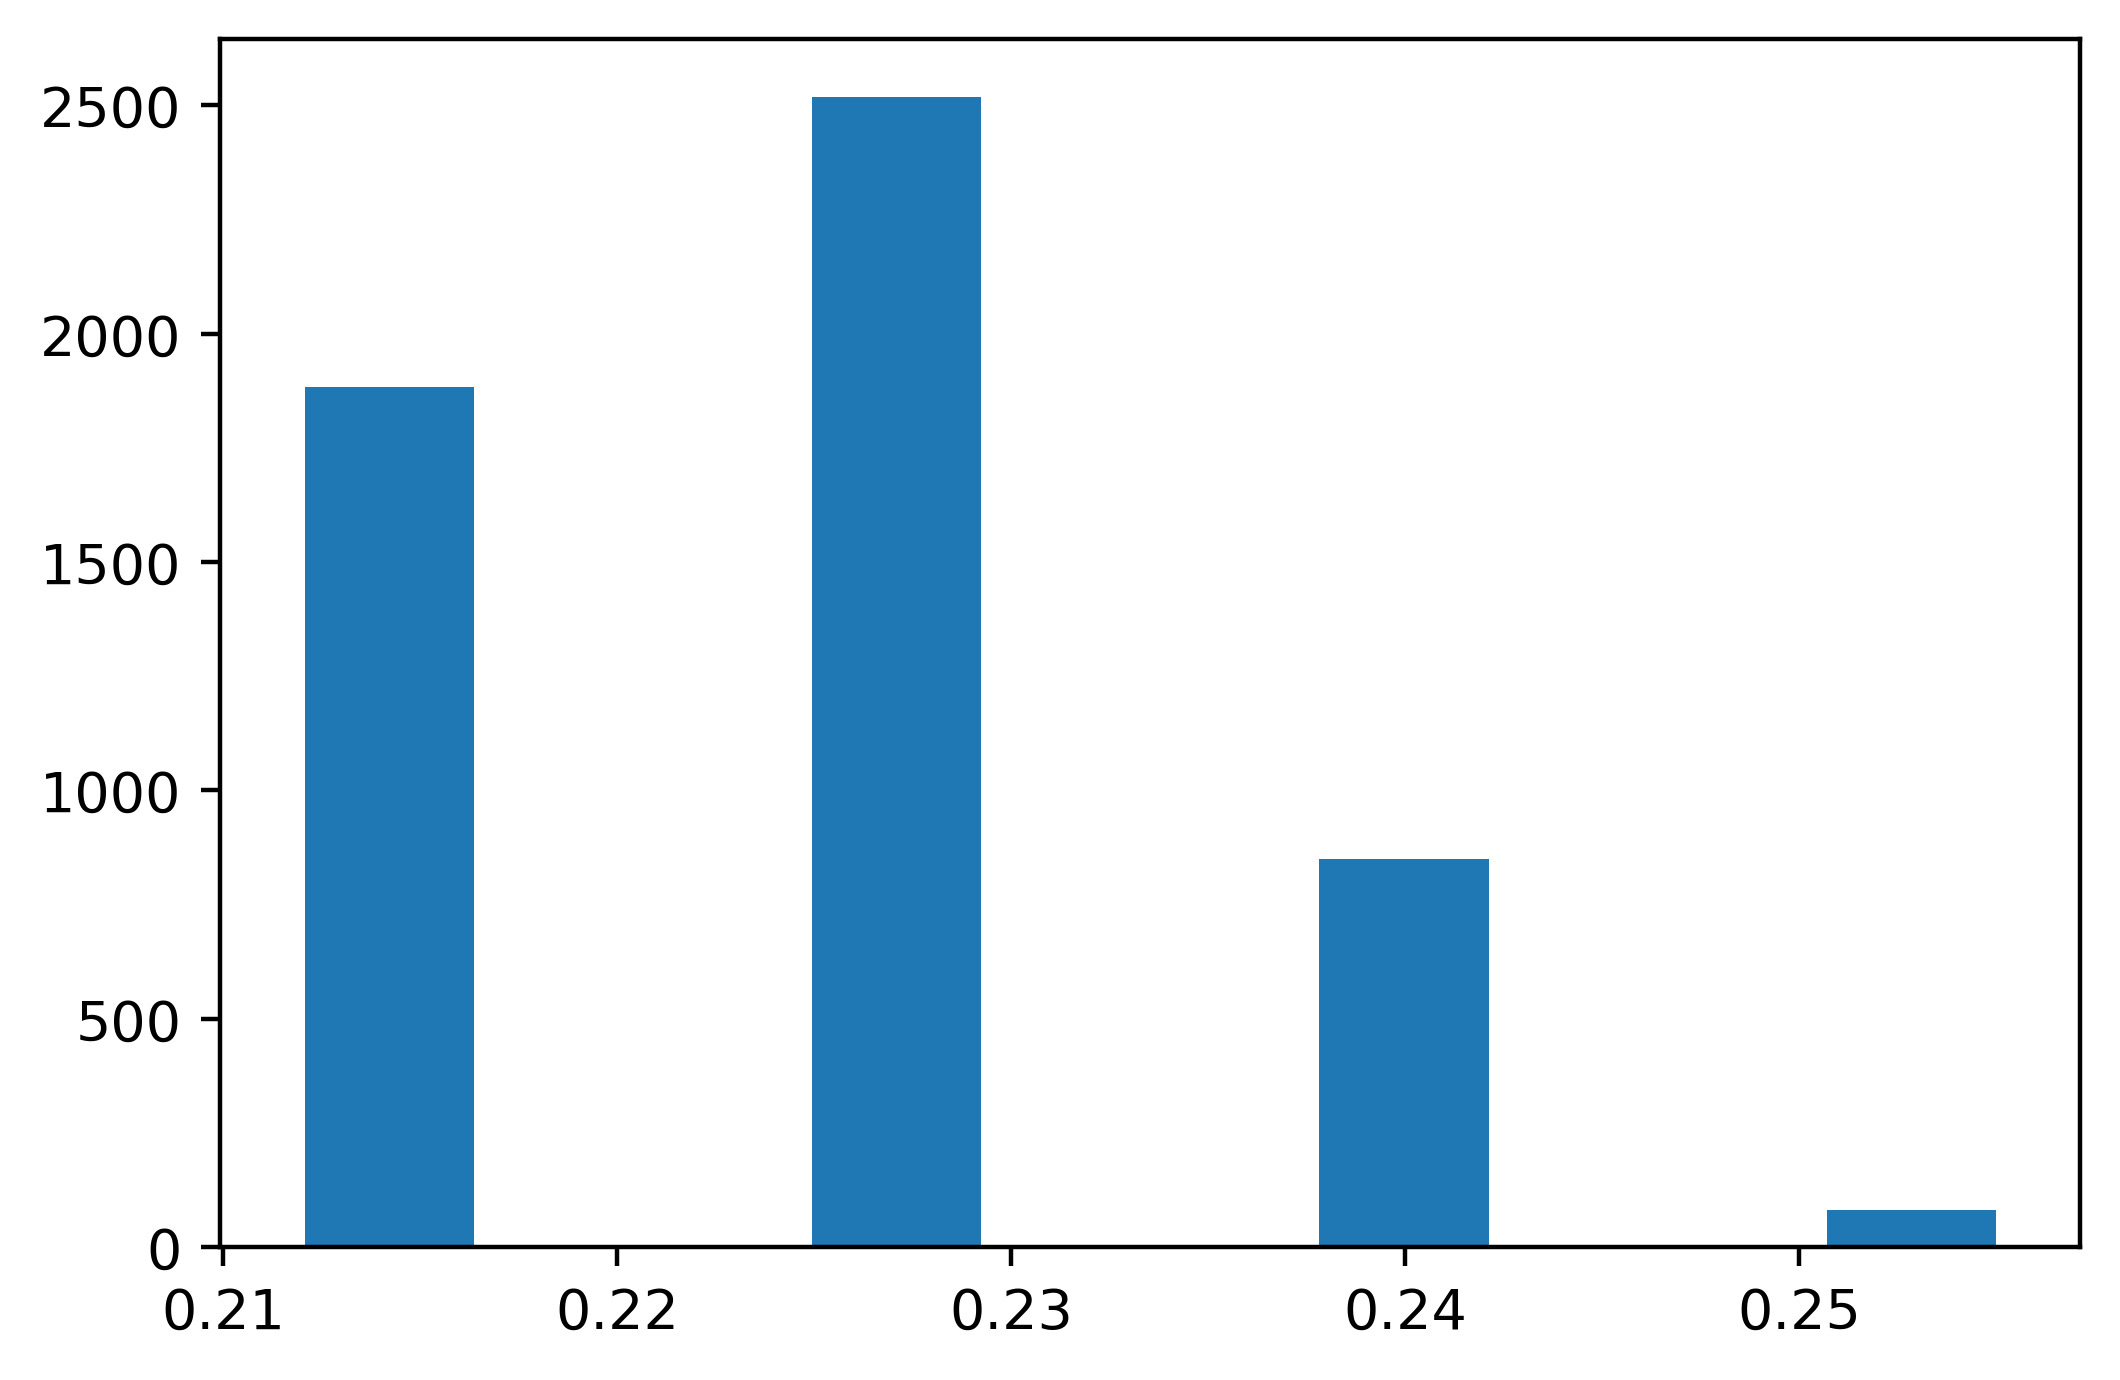

In [141]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

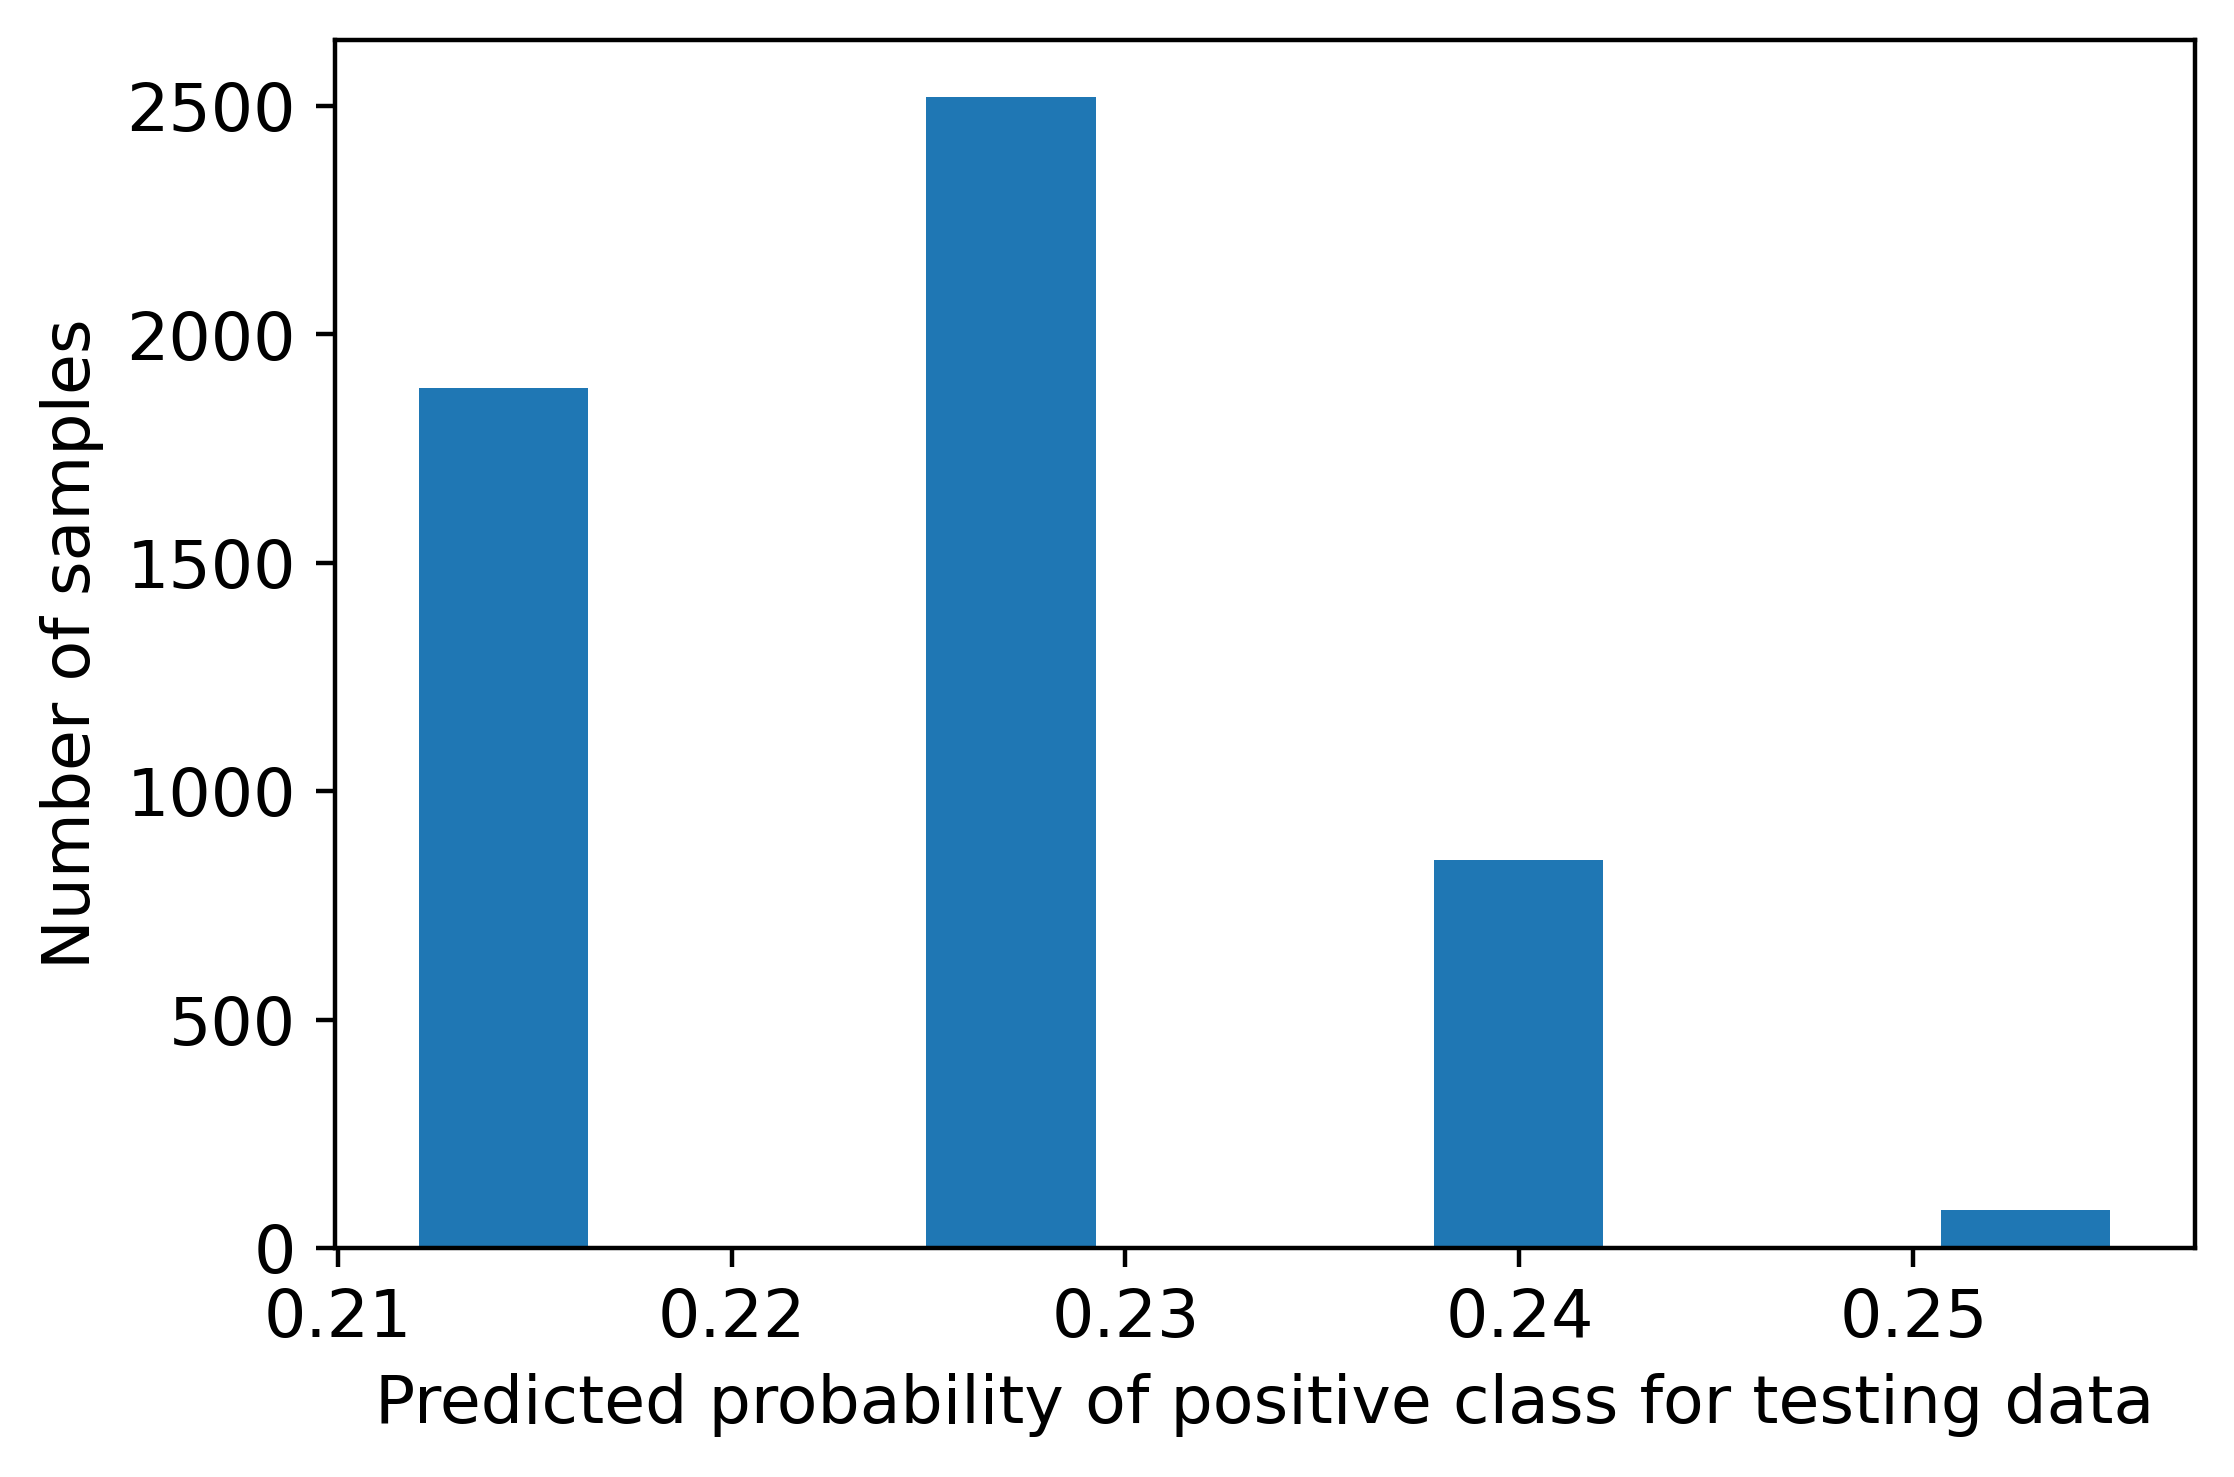

In [142]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [143]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

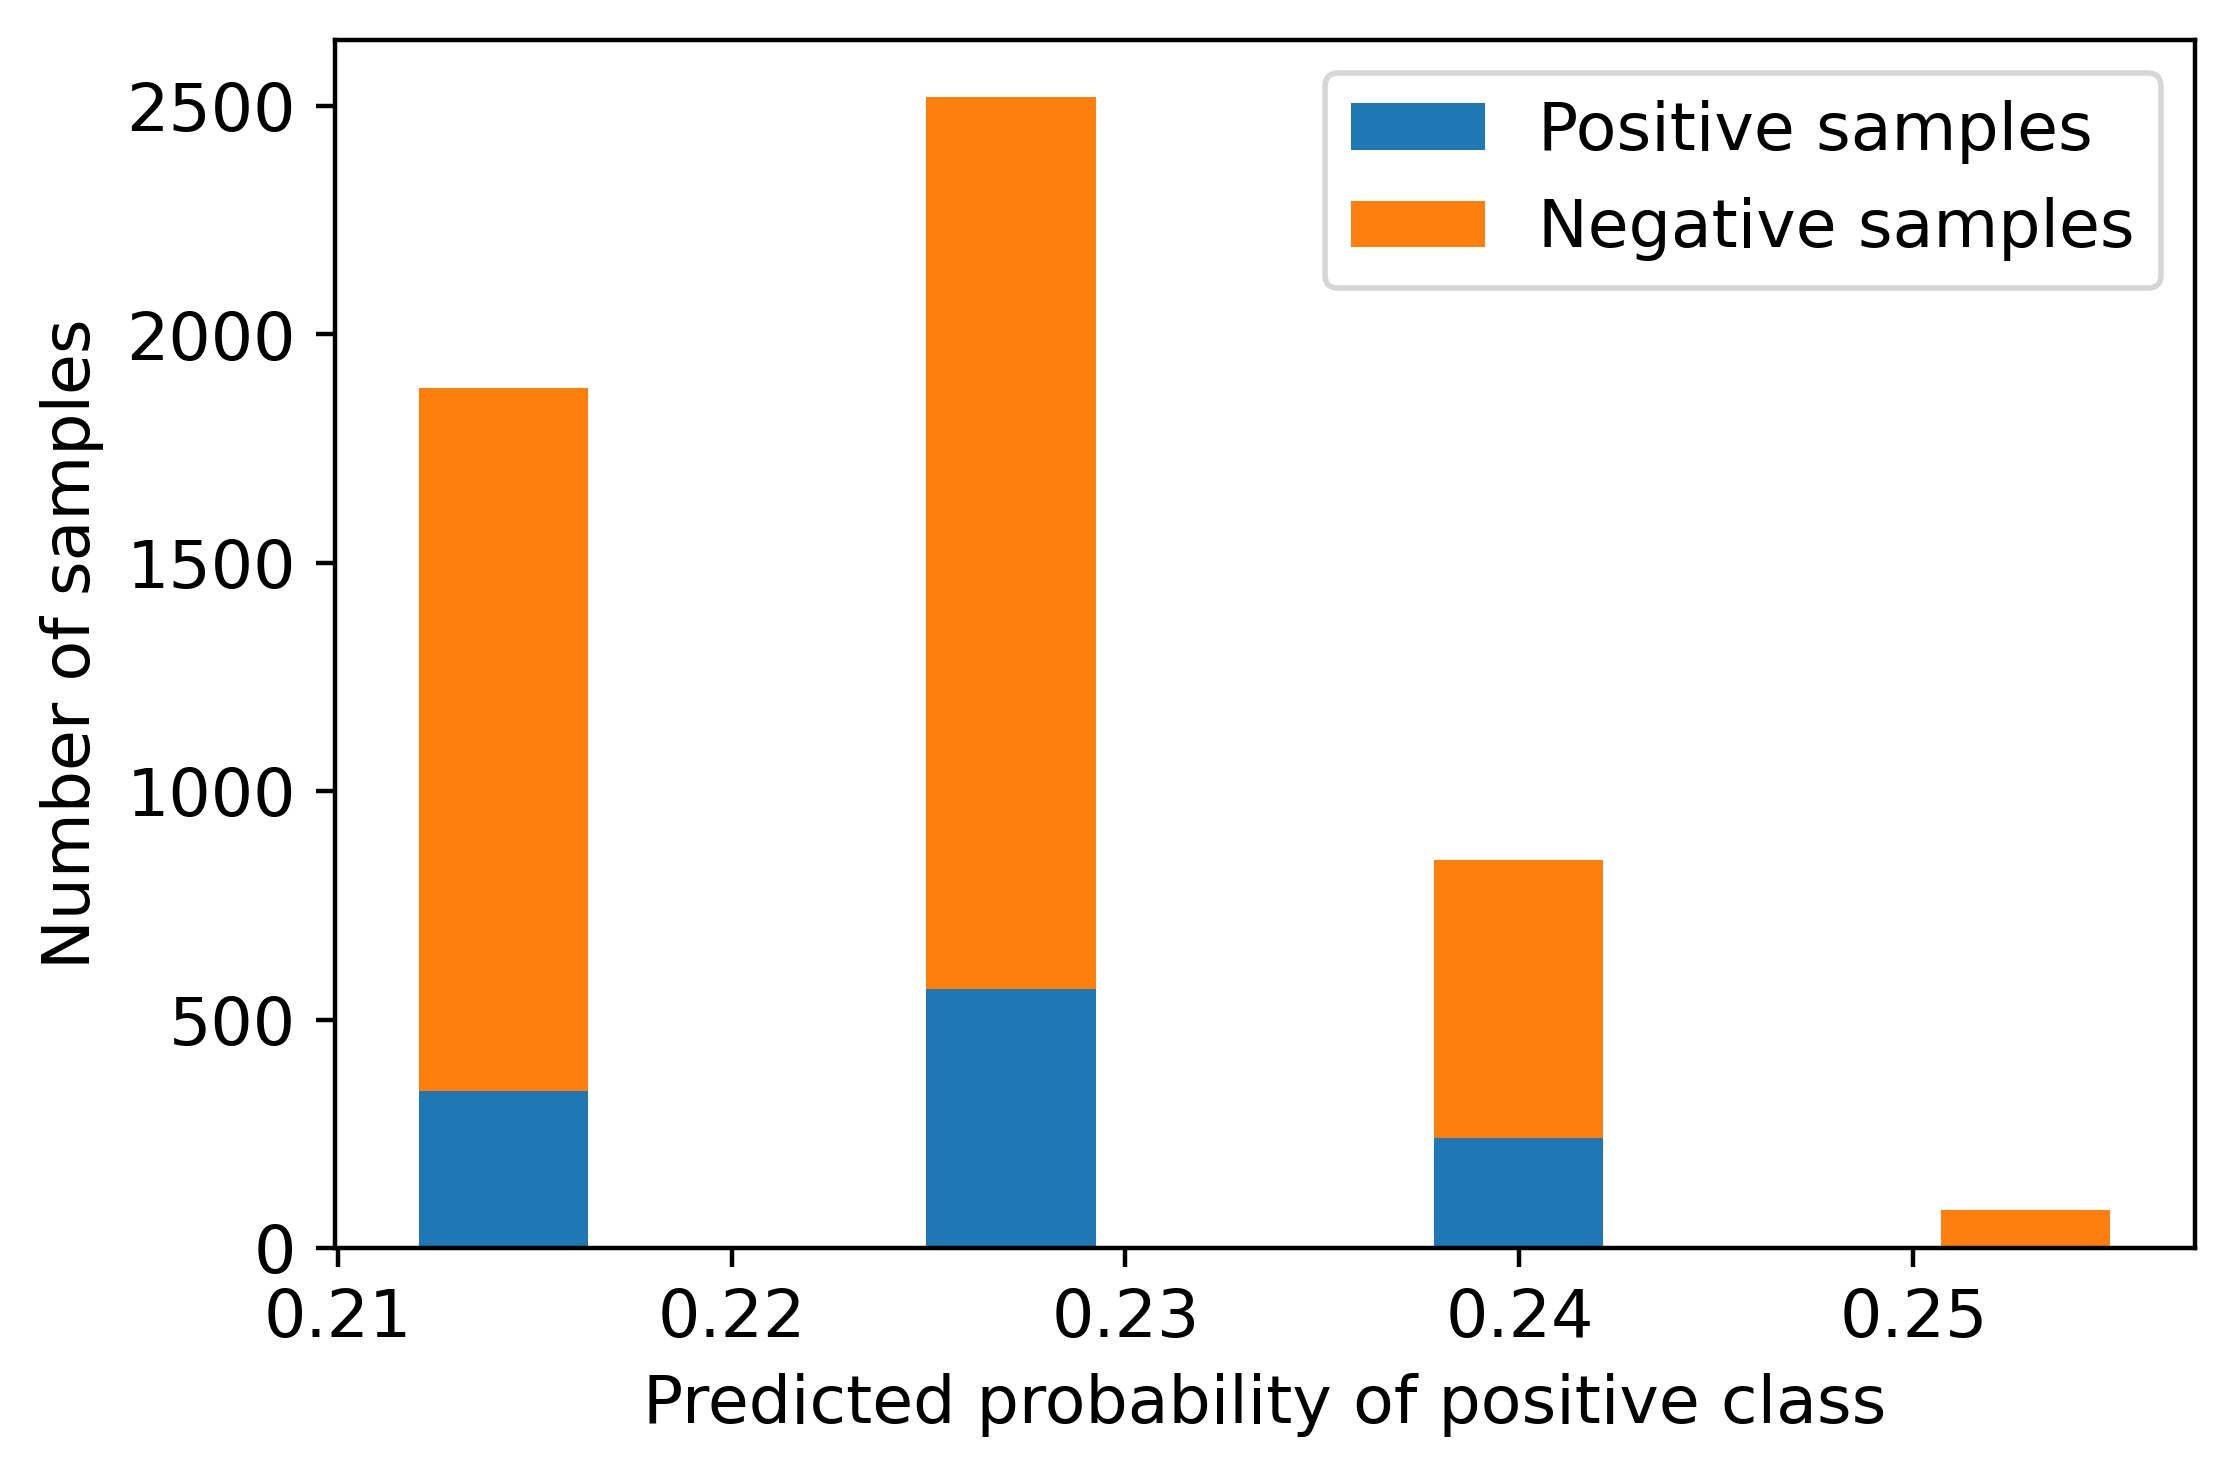

In [144]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

## The Receiver Operating Characteristic (ROC) Curve

In [145]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

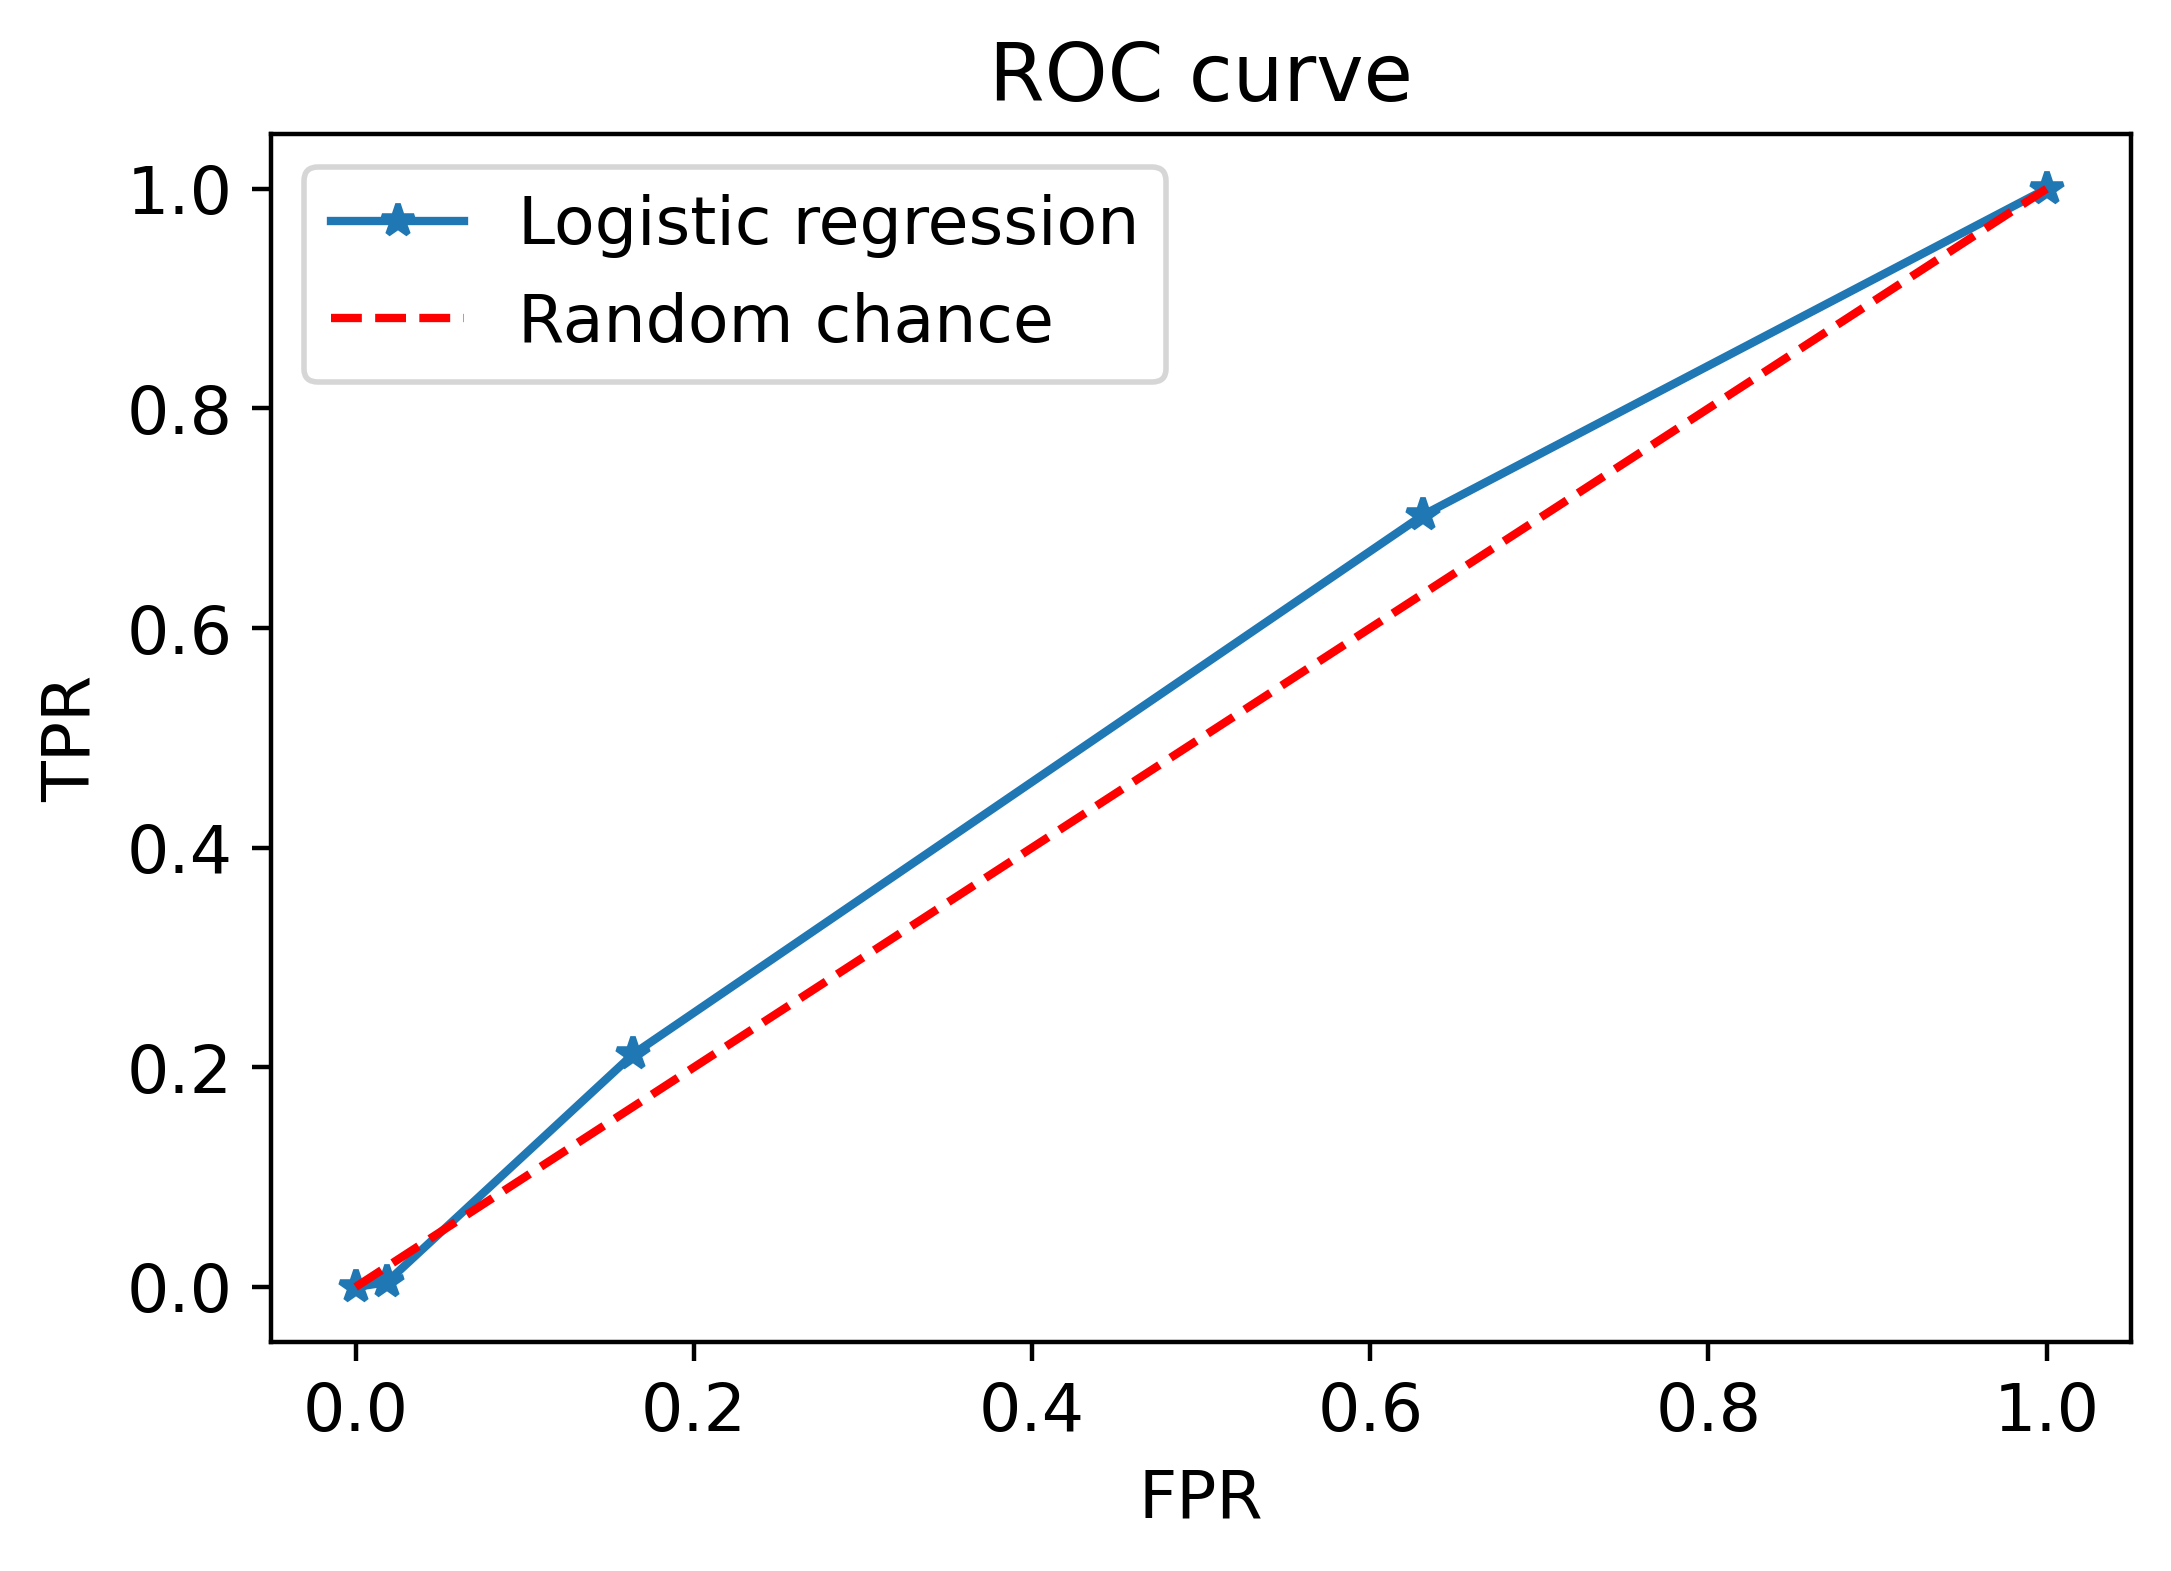

In [146]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [147]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [148]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

## Precision

In [152]:
metrics.precision_recall_curve(y_test,pos_proba)

(array([0.21657604, 0.23536232, 0.26315789, 0.06097561, 1.        ]),
 array([1.        , 0.7030303 , 0.21212121, 0.004329  , 0.        ]),
 array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ]))